# Lab4 Numpy & Matplotlib & Pandas实践

## 学习笔记

### Numpy

#### 数据类型

|Numpy 的类型|C 的类型|描述|
|:-----:|:---:|:--:|
|np.bool|bool|存储为字节的布尔值（True或False）|
|np.byte|signed char|平台定义|
|np.ubyte|unsigned char|平台定义|
|np.short|short|平台定义|
|np.ushort|unsigned short|平台定义|
|np.intc|int|平台定义|
|np.uintc|unsigned int|平台定义|
|np.int_|long|平台定义|
|np.uint|unsigned long|平台定义|
|np.longlong|long long|平台定义|
|np.ulonglong|unsigned long long|平台定义|
|np.half/np.float16||半精度浮点数：符号位，5位指数，10位尾数|
|np.single|float|平台定义的单精度浮点数：通常为符号位，8位指数，23位尾数|
|np.double|double|平台定义的双精度浮点数：通常为符号位，11位指数，52位尾数|
|np.longdouble|long double|平台定义的扩展精度浮点数|
|np.csingle|float complex|复数，由两个单精度浮点数（实部和虚部）表示|
|np.cdouble|double complex|复数，由两个双精度浮点数（实部和虚部）表示|
|np.clongdouble	long|double complex|复数，由两个扩展精度浮点数（实部和虚部）表示|

此外因为很多数据结构依赖与平台的定义，Numpy也定义定义了一些定长的数据结构

|Numpy 的类型|C 的类型|描述|
|:---------:|:-----:|:-:|
|np.int8|int8_t|字节（-128到127）|
|np.int16|int16_t|整数（-32768至32767）|
|np.int32|int32_t|整数（-2147483648至2147483647）|
|np.int64|int64_t|整数（-9223372036854775808至9223372036854775807）|
|np.uint8|uint8_t|无符号整数（0到255）|
|np.uint16|uint16_t|无符号整数（0到65535）|
|np.uint32|uint32_t|无符号整数（0到4294967295）|
|np.uint64|uint64_t|无符号整数（0到18446744073709551615）|
|np.intp|intptr_t|用于索引的整数，通常与索引相同 ssize_t|
|np.uintp|uintptr_t|整数大到足以容纳指针|
|np.float32|float|	|
|np.float64 / np.float_	double|	|请注意，这与内置python float的精度相匹配|
|np.complex64|float complex|复数，由两个32位浮点数（实数和虚数组件）表示|
|np.complex128 / np.complex_|double complex|请注意，这与内置python 复合体的精度相匹配|

#### 数组

数组是Numpy中最重要的数据结构，相当于线性代数中的矩阵或者张量

用Numpy创建数组有以下几种办法：
* 将`Python array_like`对象转换为Numpy数组
* 直接用函数创建
* 从磁盘中读取数组
* 使用特殊库

对数组进行索引有以下方法：
* 单个元素进行索引：`x[i]`
* 切片索引: `x[i, i+j]`
* 使用其他数据进行索引: `x[np.array([a, b, c])]`
* 布尔或“掩码”索引: `y[y>a]`

Numpy的广播机制：
广播机制是为了方便程序员和提高速度而实现的。受某些约束的影响，较小的数组在较大的数组上“广播”，以便它们具有兼容的形状。广播提供了一种矢量化数组操作的方法，以便在C而不是Python中进行循环。它可以在不制作不必要的数据副本的情况下实现这一点，通常导致高效的算法实现。但是，有些情况下广播是一个坏主意，因为它会导致内存使用效率低下，从而减慢计算速度。

最简单的广播的例子：

In [3]:
import numpy as np
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

在上面的示例中，b被拉伸成与a相同形状的数组

改变数组的形状
* `ndarray.reshape(shape)`
* `ndarray.resize(shape)`
* `ndarray.flatten()`
* `ndarray.ravel()`

Numpy的随机函数：
* 简单随机数
    * `np.random.rand`
    * `np.random.randn`
    * `np.random.randint`
* 生成器
    * `np.random.seed`
* 排列：
    * `np.random.shuffle`
* 随机选择：
    * `np.random.choice`
* 分布：
    * `np.random.uniform`
    * `np.random.normal`
    * `np.random.poisson`

数组元素间的运算：
* `np.abs(a)`
* `np.square(a)`
* `np.log(a)`
* `np.log2(a)`
* `np.log10(a)`
* `np.ceil(a)`
* `np.rint(a)`
* `np.exp(a)`
* `np.sign(a)`
* `np.mod(a, b)`

Numpy统计函数：
* `np.mean(x[, axis])`
* `np.sum(x[, axis])`
* `np.max(x[, axis])`
* `np.min(x[, axis])`
* `np.std(x[, axis])`
* `np.var(x[, axis]`
* `np.argmax(x[, axis])`
* `np.argmin(x[, axis])`

Numpy矩阵：
* 创建：`np.mat(a)`（a是一个数组）
* 矩阵相乘：`A*B`
* 矩阵转置：`A.T`
* 矩阵求逆：`A.I`
* 奇异值分解：`np.linalg.svd`

### Matplotlib

导入：

In [2]:
import matplotlib.pyplot as plt

`plt.figure()`创建一个全局绘图区域，并且试它成为当前的绘图对象，传入的参数如下：
* `num`:图形编号或名称
* `figsize`:绘图对象的宽和高
* `dpi`:绘图对象的分辨率，缺省值为80
* `facecolor`:背景颜色
* `edgecolor`:边框颜色
* `frameon`:表示是否显示边框
示例：

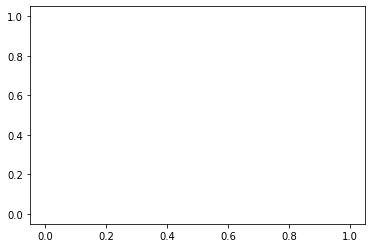

In [5]:
# 在jupyter中展示图
%matplotlib inline
# 创建一个全局绘图区域（画布）
plt.figure()
# 绘制空白区
plt.plot()
# 显示绘图
plt.show()

`plt.subplot`函数在全局绘图区域中创建一个子绘图区域:
* 当`plt.subplot()`函数中的3个参数都小于10时，可以省略参数间的逗号，用一个三位数来表示
* 每个`plt.subplot()`函数只创建一个子图

示例：将画布划分为$2\times 2$的子图区域，并绘制4个子图

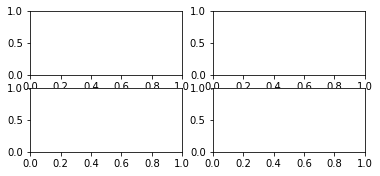

In [13]:
# 在全局绘图区域内创建子绘图区域
plt.subplot(321)
plt.subplot(322)
plt.subplot(323)
plt.subplot(324)

设置中文字体：`plt.rcParams["font.sans-serif"] = "SimHei"`

添加全局标题：`plt.suptitle("title")`

添加子标题：`plt.title("title)`

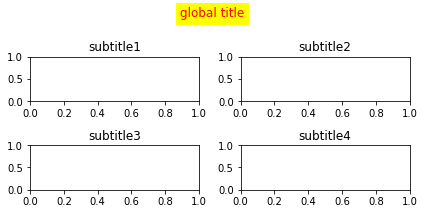

In [17]:
# 示例：将画布划分为2X2的子图区域，并绘制4个子图
import matplotlib.pyplot as plt
%matplotlib inline 

plt.suptitle("global title", fontsize=12, color="red", backgroundcolor="yellow")

plt.subplot(321)
plt.title("subtitle1")

plt.subplot(322)
plt.title("subtitle2")

plt.subplot(323)
plt.title("subtitle3")

plt.subplot(324)
plt.title("subtitle4")

plt.tight_layout(rect=[0,0,1,0.9])

绘制散点图示例：

Text(0, 0.5, 'y')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


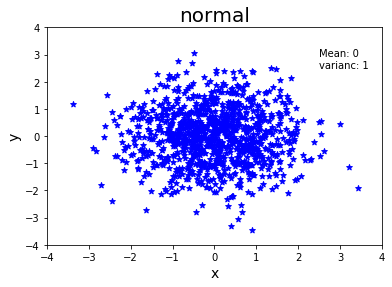

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 标准正态分布的散点坐标
n = 1024
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

# 绘制散点图
plt.scatter(x, y, color="blue", marker="*")

# 设置标题
plt.title("normal", fontsize=20)

# 设置文本
plt.text(2.5, 2.5, "Mean: 0\nvarianc: 1")

# 设置坐标轴范围
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# 设置坐标轴标签
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

绘制正态分布、均匀分布的散点图：

Text(0, 0.5, 'y')

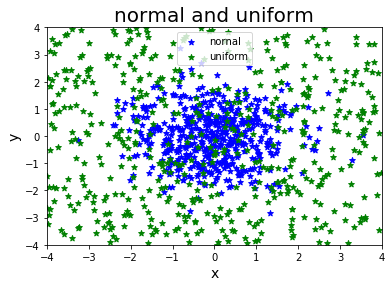

In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# 正态分布和均匀分布的散点坐标
n = 512
x1 = np.random.normal(0, 1, n)
y1 = np.random.normal(0, 1, n)

x2 = np.random.uniform(-4, 4, n)
y2 = np.random.uniform(-4, 4, n)

# 绘制散点图
plt.scatter(x1, y1, color="blue", marker="*", label="nornal")
plt.scatter(x2, y2, color="green", marker="*", label="uniform")
plt.legend()

# 设置标题
plt.title("normal and uniform", fontsize=20)

# 设置坐标轴范围
plt.xlim(-4, 4)
plt.ylim(-4, 4)

#设置坐标轴标签
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

另外的一些操作：
* 彩色映射：`plt.scatter(x, y, c, cmap)`
* 在散点图基础上将相邻点用线段相连接：`plt.plot(x, y, marker, label, linewidth, markersize)`
* 柱状图：`plt.bar(left, height, width, facecolor, edgecolor, label)`
* 横向条形图：`plt.barh(bottom, width, height, left)`
* 饼图：`plt.pie(data, explode)`
* 等高线图：`plt.contour(x, y, z)`
* 直方图：`plt.hist(x, bins, normed)`

plt的更多函数：
![](https://tva1.sinaimg.cn/large/007S8ZIlgy1gjiwzo13sbj31o60mcdpl.jpg)

### pandas

数据类型：
* Series：`pd.Series(data, index=index)`
* DataFrame: `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

`DataFrame`的基本操作：
![](https://tva1.sinaimg.cn/large/007S8ZIlgy1gjix7ub0aaj314i0lc0yg.jpg)

pandas读写文件：
* 写入csv文件：`df.tocsv()`
* 读取csv文件：`pd.read_csv()`
* 写入Excel文件：`df.to_excel()`
* 读取Excel文件：`pd.read_excel()`